In [1]:
!pip install viam-sdk

In [2]:
import os
from dotenv import load_dotenv
from viam.rpc.dial import DialOptions
from viam.app.viam_client import ViamClient
from viam.utils import create_filter

load_dotenv()

async def get_viam_client() -> ViamClient:
    dial_options = DialOptions.with_api_key(
        api_key_id=os.environ.get("VIAM_API_KEY_ID"),
        api_key=os.environ.get("VIAM_API_KEY"),
    )
    return await ViamClient.create_from_dial_options(dial_options)

In [3]:
viam_client = await get_viam_client()

In [4]:
data_client = viam_client.data_client

In [13]:
sensor_filter = create_filter(
    component_name=os.environ.get("MOVEMENT_SENSOR_NAME"),
    robot_id=os.environ.get("ROBOT_ID"),
)
sensor_data = []
last = None
while len(sensor_data) < 2000:
    tabular_data, count, last = await data_client.tabular_data_by_filter(filter=sensor_filter, last=last)
    if not tabular_data:
        break
    sensor_data += tabular_data

display(sensor_data)

[DataClient.TabularData(data={'readings': {'linear_acceleration': {'y': 0.05748046875, '_type': 'vector3', 'z': 10.159672851562501, 'x': -1.1136840820312501}, 'angular_velocity': {'y': 1.25885009765625, '_type': 'angular_velocity', 'z': -0.23651123046875, 'x': -1.24359130859375}, 'temperature_celsius': 19.635882352941177}}, metadata=organization_id: "6efeb7e5-91aa-4187-8ed3-e84764726078"
 location_id: "3l1tob1057"
 robot_name: "laundry-monitor"
 robot_id: "0f8679dc-c564-4a1c-9d45-af5c8448b179"
 part_name: "laundry-monitor-main"
 part_id: "291069b7-df8e-49fb-85f8-5ffb418a235e"
 component_type: "rdk:component:movement_sensor"
 component_name: "washer-movement"
 method_name: "Readings"
 mime_type: "x-application/tabular"
 , time_requested=datetime.datetime(2024, 4, 26, 18, 5, 59, 41000), time_received=datetime.datetime(2024, 4, 26, 18, 5, 59, 41000)),
 DataClient.TabularData(data={'readings': {'linear_acceleration': {'y': 0.055085449218750006, '_type': 'vector3', 'z': 10.1165625, 'x': -1.

In [7]:
!pip install matplotlib

In [8]:
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(sensor_data)

In [11]:
display(df)

,data,metadata,time_requested,time_received
0,{'readings': {'linear_acceleration': {'y': 0.0...,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 18:05:59.041,2024-04-26 18:05:59.041
1,{'readings': {'linear_acceleration': {'y': 0.0...,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 18:06:01.040,2024-04-26 18:06:01.041
2,{'readings': {'linear_acceleration': {'y': 0.1...,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 18:06:03.041,2024-04-26 18:06:03.042
3,{'readings': {'linear_acceleration': {'y': 0.0...,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 18:06:05.041,2024-04-26 18:06:05.041
4,{'readings': {'linear_acceleration': {'y': 0.1...,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 18:06:07.041,2024-04-26 18:06:07.041
...,...,...,...,...
1995,{'readings': {'linear_acceleration': {'y': 0.3...,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 19:12:29.041,2024-04-26 19:12:29.041
1996,{'readings': {'linear_acceleration': {'y': 0.1...,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 19:12:31.041,2024-04-26 19:12:31.041
1997,{'readings': {'linear_acceleration': {'y': 0.0...,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 19:12:33.041,2024-04-26 19:12:33.041
1998,{'readings': {'linear_acceleration': {'y': -0....,"organization_id: ""6efeb7e5-91aa-4187-8ed3-e847...",2024-04-26 19:12:35.041,2024-04-26 19:12:35.041


,y,_type,z,x
0,1.258850,angular_velocity,-0.236511,-1.243591
1,1.266479,angular_velocity,-0.175476,-1.174927
2,1.312256,angular_velocity,-0.267029,-1.197815
3,0.984192,angular_velocity,-0.289917,-1.190186
4,1.419067,angular_velocity,-0.213623,-1.281738
...,...,...,...,...
1995,2.052307,angular_velocity,-0.312805,-1.487732
1996,0.045776,angular_velocity,-0.190735,-0.534058
1997,-1.419067,angular_velocity,-0.083923,-1.365662
1998,0.816345,angular_velocity,0.007629,-1.243591


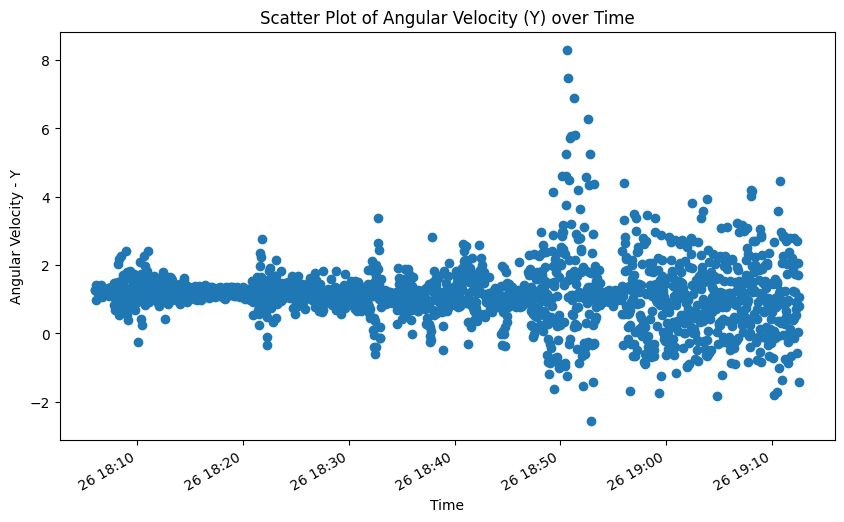

In [12]:
time = df['time_received']
readings_frame = pd.DataFrame([row.data['readings']['angular_velocity'] for row in sensor_data])
display(readings_frame)
plt.figure(figsize=(10, 6))
plt.scatter(df['time_received'], readings_frame['y'])
plt.xticks(rotation=45)
plt.gcf().autofmt_xdate()
plt.xlabel('Time')
plt.ylabel('Angular Velocity - Y')
plt.title('Scatter Plot of Angular Velocity (Y) over Time')
plt.show()